# Análise Exploratória dos dados

## Setup

In [1]:
# carregamento das bibliotecas
import sys
sys.path.append('..')
from src.data.preprocessing import *
from src.data.load_data import salvar_dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale


In [2]:
# carregamento datasets

tbl_vendas = pd.read_excel('../data/raw/Base_de_dados_desafio.xlsx', sheet_name='base compra')
tbl_clientes = pd.read_excel('../data/raw/Base_de_dados_desafio.xlsx', sheet_name='Base cliente')



In [3]:
tbl_vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2021-03-30,791.280,791.280,Telefones e Celulares,"SP,Brasil",14098
1,411885,Mobile,A,2021-03-30,679.200,679.200,Tablets,"SP,Brasil",24992
2,437305,Mobile,A,2021-03-30,35.920,37.512,Bebes,"SP,Brasil",9870
3,440055,Aplicativo,A,2021-03-30,2239.416,2239.416,TVs e Acessorios,"SP,Brasil",171
4,455795,Mobile,B,2021-03-30,1743.200,1785.112,Esporte e Lazer,"RS,Brasil",12181


# Data Wrangling

In [4]:
# amostragem dos dados da tabela vendas
amostra_dados(tbl_vendas)

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
76515,241900,Mobile,A,2021-04-11,319.176,341.464,Moveis,"SP,Brasil",24126
40839,463250,Internet,B,2021-04-05,863.280,863.280,Acessorios e Inovacoes,"SP,Brasil",8963
46504,362780,Internet,A,2021-04-06,1959.216,1959.216,Tablets,"SP,Brasil",868


In [5]:
# amostragem dos dados da tabela clientes
amostra_dados(tbl_clientes)

,cliente_Log,idade,uf_nascimento,renda
1516,21628,64,RJ,14843
19575,23457,73,SP,8381
23297,25153,68,MG,10693


In [6]:
# informação da tabela de vendas
tbl_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [7]:
# informação da tabela de clientes
tbl_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cliente_Log    26425 non-null  int64 
 1   idade          26425 non-null  int64 
 2   uf_nascimento  26425 non-null  object
 3   renda          26425 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 825.9+ KB


Base de cadastro problemática

In [8]:
# verificação de id's duplicados na base de cadastro
tbl_clientes.cliente_Log.value_counts()

cliente_Log
27855    7
1563     6
16473    6
26298    6
22913    6
        ..
10268    1
5024     1
4593     1
10884    1
16428    1
Name: count, Length: 17040, dtype: int64

In [9]:
tbl_clientes[tbl_clientes.cliente_Log==27855]

,cliente_Log,idade,uf_nascimento,renda
499,27855,64,SP,13742
656,27855,82,RJ,14296
1327,27855,53,SP,2953
11798,27855,19,RJ,8259
19179,27855,74,RN,10698
19564,27855,36,SP,12222
24084,27855,86,SP,5062


In [10]:
tbl_clientes[tbl_clientes.cliente_Log.duplicated()]

,cliente_Log,idade,uf_nascimento,renda
213,12576,43,RJ,2044
217,13651,25,SP,11436
232,23218,68,RJ,3549
242,8474,70,RS,13567
371,9770,18,SP,11157
...,...,...,...,...
26417,3235,42,SP,8527
26419,2459,84,SP,13120
26421,22379,31,SC,5108
26422,27351,35,RJ,13136


In [11]:
# tratamento de valores duplicados da tabela clientes
tbl_clientes = remover_duplicados(tbl_clientes, 'cliente_Log')
tbl_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17040 entries, 0 to 26424
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cliente_Log    17040 non-null  int64 
 1   idade          17040 non-null  int64 
 2   uf_nascimento  17040 non-null  object
 3   renda          17040 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 665.6+ KB


In [12]:
# verificação de valores duplicados após tratamento
valores_duplicados = tbl_clientes['cliente_Log'].value_counts()

contagens_filtradas = valores_duplicados[valores_duplicados > 1]
contagens_filtradas



Series([], Name: count, dtype: int64)

In [13]:
tbl_vendas[tbl_vendas.cliente_Log==9352]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2999,19595,Mobile,A,2021-03-30,199.920,199.920,Eletroportateis,"SP,Brasil",9352
5075,345985,Mobile,B,2021-03-30,1103.200,1103.200,Telefones e Celulares,"PI,Brasil",9352
12219,254950,Aplicativo,B,2021-03-31,1119.200,1127.120,Eletrodomesticos,"SP,Brasil",9352
13450,456490,Internet,A,2021-03-31,47.040,54.240,Produtos de Limpeza,"MG,Brasil",9352
19832,353845,Aplicativo,B,2021-04-01,1279.200,1279.200,Telefones e Celulares,"SP,Brasil",9352
27133,314485,Internet,B,2021-04-02,1155.464,1155.464,Telefones e Celulares,"RJ,Brasil",9352
50066,356240,Internet,B,2021-04-06,2439.200,2535.120,Eletrodomesticos,"RJ,Brasil",9352
53611,348585,Mobile,A,2021-04-07,51.920,55.112,Bebes,"MG,Brasil",9352
61056,270975,Mobile,B,2021-04-08,63.920,63.920,Utilidades Domesticas,"RS,Brasil",9352
73788,305100,Mobile,B,2021-04-10,680.000,680.000,Moveis,"RJ,Brasil",9352


In [14]:
# verificação de duplicados
(
    tbl_clientes.groupby(tbl_clientes.columns.tolist(), dropna=False)
    .size()
    .to_frame('n_duplicates')
    .query('n_duplicates>1')
    .sort_values(by ='n_duplicates', ascending=False)
    .head(5)
)

,,,,n_duplicates
cliente_Log,idade,uf_nascimento,renda,


In [15]:
tbl_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


# Clientes não-localizados

In [16]:
tbl_vendas[tbl_vendas['idcompra']==334870]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
40586,334870,Mobile,A,2021-04-05,879.20,879.200,Telefones e Celulares,"SP,Brasil",13256
58612,334870,Aplicativo,B,2021-04-07,111.92,111.920,Eletroportateis,"SP,Brasil",21215
58989,334870,Mobile,B,2021-04-07,197.52,207.112,Bebes,"MG,Brasil",11384
68570,334870,Aplicativo,B,2021-04-09,87.92,99.032,Beleza e Saude,"AL,Brasil",25172
76298,334870,Internet,B,2021-04-11,3199.20,3207.120,Eletrodomesticos,"SP,Brasil",1015
78865,334870,Mobile,A,2021-04-12,223.92,236.640,Utilidades Domesticas,"GO,Brasil",1711


In [17]:
# juncao das tabelas
clientes_sem_cadastro = tbl_vendas.merge(tbl_clientes, on='cliente_Log', how='left')
clientes_sem_cadastro

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,idade,uf_nascimento,renda
0,393835,Mobile,A,2021-03-30,791.280,791.280,Telefones e Celulares,"SP,Brasil",14098,37.0,SP,6757.0
1,411885,Mobile,A,2021-03-30,679.200,679.200,Tablets,"SP,Brasil",24992,NaN,NaN,NaN
2,437305,Mobile,A,2021-03-30,35.920,37.512,Bebes,"SP,Brasil",9870,88.0,PR,10789.0
3,440055,Aplicativo,A,2021-03-30,2239.416,2239.416,TVs e Acessorios,"SP,Brasil",171,NaN,NaN,NaN
4,455795,Mobile,B,2021-03-30,1743.200,1785.112,Esporte e Lazer,"RS,Brasil",12181,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
80223,636930,Aplicativo,B,2021-04-09,879.200,879.200,Telefones e Celulares,"RJ,Brasil",7707,28.0,MG,14647.0
80224,658550,Aplicativo,B,2021-04-09,879.200,879.200,Telefones e Celulares,"AM,Brasil",5925,51.0,MG,8568.0
80225,680170,Aplicativo,B,2021-04-09,879.200,879.200,Telefones e Celulares,"PB,Brasil",246,74.0,DF,1724.0
80226,701790,Aplicativo,B,2021-04-09,879.200,879.200,Telefones e Celulares,"PB,Brasil",21595,86.0,RJ,4108.0


In [18]:
# juncao das tabelas
tbl_vendas = tbl_vendas.merge(tbl_clientes, on='cliente_Log', how='inner')
tbl_vendas

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,idade,uf_nascimento,renda
0,393835,Mobile,A,2021-03-30,791.28,791.280,Telefones e Celulares,"SP,Brasil",14098,37,SP,6757
1,437305,Mobile,A,2021-03-30,35.92,37.512,Bebes,"SP,Brasil",9870,88,PR,10789
2,464255,Internet,A,2021-03-30,599.20,599.200,Eletrodomesticos,"SP,Brasil",22929,46,SP,2226
3,75525,Mobile,B,2021-03-30,679.20,695.120,Moveis,"SP,Brasil",14345,83,SP,9428
4,108780,Aplicativo,A,2021-03-30,1279.20,1279.200,TVs e Acessorios,"RN,Brasil",2089,32,MG,6607
...,...,...,...,...,...,...,...,...,...,...,...,...
48813,615310,Aplicativo,B,2021-04-09,879.20,879.200,Telefones e Celulares,"RJ,Brasil",3091,79,SP,13985
48814,636930,Aplicativo,B,2021-04-09,879.20,879.200,Telefones e Celulares,"RJ,Brasil",7707,28,MG,14647
48815,658550,Aplicativo,B,2021-04-09,879.20,879.200,Telefones e Celulares,"AM,Brasil",5925,51,MG,8568
48816,680170,Aplicativo,B,2021-04-09,879.20,879.200,Telefones e Celulares,"PB,Brasil",246,74,DF,1724


In [19]:
tbl_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48818 entries, 0 to 48817
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           48818 non-null  int64         
 1   idcanalvenda       48818 non-null  object        
 2   bandeira           48818 non-null  object        
 3   Data               48818 non-null  datetime64[ns]
 4   Preço              48818 non-null  float64       
 5   Preço_com_frete    48818 non-null  float64       
 6   Nome_Departamento  48818 non-null  object        
 7   estado             48818 non-null  object        
 8   cliente_Log        48818 non-null  int64         
 9   idade              48818 non-null  int64         
 10  uf_nascimento      48818 non-null  object        
 11  renda              48818 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 4.5+ MB


In [20]:
tbl_vendas['sigla_estado'] = tbl_vendas['estado'].str.split(",").str[0]


In [21]:
tbl_vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,idade,uf_nascimento,renda,sigla_estado
0,393835,Mobile,A,2021-03-30,791.28,791.280,Telefones e Celulares,"SP,Brasil",14098,37,SP,6757,SP
1,437305,Mobile,A,2021-03-30,35.92,37.512,Bebes,"SP,Brasil",9870,88,PR,10789,SP
2,464255,Internet,A,2021-03-30,599.20,599.200,Eletrodomesticos,"SP,Brasil",22929,46,SP,2226,SP
3,75525,Mobile,B,2021-03-30,679.20,695.120,Moveis,"SP,Brasil",14345,83,SP,9428,SP
4,108780,Aplicativo,A,2021-03-30,1279.20,1279.200,TVs e Acessorios,"RN,Brasil",2089,32,MG,6607,RN


In [22]:
# construção da coluna com o valor de frete
tbl_vendas['vl_frete'] =tbl_vendas['Preço_com_frete'] - tbl_vendas['Preço']

In [23]:
tbl_vendas.idcompra.value_counts()

idcompra
334870    5
394310    5
393660    5
303265    5
307685    5
         ..
8240      1
4025      1
481885    1
422515    1
344460    1
Name: count, Length: 38940, dtype: int64

In [24]:
tbl_vendas[tbl_vendas['cliente_Log']==2]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,idade,uf_nascimento,renda,sigla_estado,vl_frete
2381,422055,Internet,A,2021-03-30,64.728,71.92,Eletroportateis,"RJ,Brasil",2,50,MG,8587,RJ,7.192
3429,78395,Internet,A,2021-03-30,183.920,194.24,Utilidades Domesticas,"BA,Brasil",2,50,MG,8587,BA,10.320
4397,73485,Internet,A,2021-03-30,1039.200,1039.20,Eletrodomesticos,"SP,Brasil",2,50,MG,8587,SP,0.000
27532,94890,Aplicativo,B,2021-04-06,2799.200,2799.20,Eletrodomesticos,"MG,Brasil",2,50,MG,8587,MG,0.000


In [25]:
tbl_vendas.groupby('cliente_Log').agg({'idcompra':['nunique', 'count']}).sort_values(by=('idcompra', 'nunique'), ascending=False)

idcompra      
             nunique count
cliente_Log               
24181             12    12
340               11    11
9352              11    11
15443             11    11
26111             10    10
...              ...   ...
2695               1     1
2691               1     1
23111              1     1
27931              1     1
27927              1     1

[16025 rows x 2 columns]

In [26]:
tbl_analise = remover_duplicados(tbl_vendas, 'cliente_Log')

In [27]:
tbl_analise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16025 entries, 0 to 48802
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           16025 non-null  int64         
 1   idcanalvenda       16025 non-null  object        
 2   bandeira           16025 non-null  object        
 3   Data               16025 non-null  datetime64[ns]
 4   Preço              16025 non-null  float64       
 5   Preço_com_frete    16025 non-null  float64       
 6   Nome_Departamento  16025 non-null  object        
 7   estado             16025 non-null  object        
 8   cliente_Log        16025 non-null  int64         
 9   idade              16025 non-null  int64         
 10  uf_nascimento      16025 non-null  object        
 11  renda              16025 non-null  int64         
 12  sigla_estado       16025 non-null  object        
 13  vl_frete           16025 non-null  float64       
dtypes: datetime

# Dados de renda uniformizados

<Axes: ylabel='Frequency'>

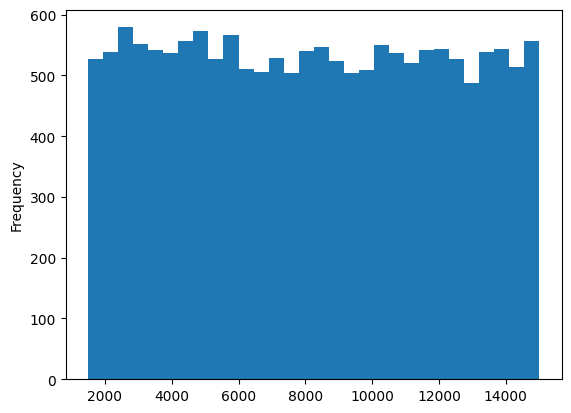

In [28]:
tbl_analise.renda.plot.hist(bins=30)

In [29]:
pd.cut(tbl_analise.renda, 15).value_counts(normalize=True)

renda
(2400.0, 3300.0]      0.070515
(4200.0, 5100.0]      0.070515
(5100.0, 6000.0]      0.068206
(7800.0, 8700.0]      0.067832
(11400.0, 12300.0]    0.067769
(13200.0, 14100.0]    0.067582
(3300.0, 4200.0]      0.067145
(14100.0, 15000.0]    0.066708
(1486.5, 2400.0]      0.066646
(9600.0, 10500.0]     0.066084
(10500.0, 11400.0]    0.065897
(6900.0, 7800.0]      0.064399
(8700.0, 9600.0]      0.064087
(6000.0, 6900.0]      0.063401
(12300.0, 13200.0]    0.063214
Name: proportion, dtype: float64

# Refatorar as categorias de produto

In [30]:
tbl_vendas.Nome_Departamento.value_counts()

Nome_Departamento
Telefones e Celulares     2744
Eletroportateis           2117
Eletrodomesticos          2012
Informatica               1238
TVs e Acessorios          1018
Bebes                      986
Beleza e Saude             943
Utilidades Domesticas      928
Moveis                     793
Acessorios e Inovacoes     768
Tablets                    378
Audio                      341
Brinquedos                 267
Ferramentas                259
Automotivo                 213
Ar e Ventilacao            202
Produtos de Limpeza        178
Games                      151
Perfumaria                 149
Esporte e Lazer            119
Casa e Construcao           74
Cama, Mesa e Banho          36
Relogios                    33
Decoracao                   32
Malas e Mochilas            25
Linha Industrial            13
Pet Shop                     5
TV e Video                   1
Cine e Foto                  1
Moda                         1
Name: count, dtype: int64

# Tratamento coluna idcanalvenda

In [31]:
tbl_vendas.idcanalvenda.value_counts()

idcanalvenda
Mobile        5613
Internet      5596
Aplicativo    4715
Mobil          101
Name: count, dtype: int64

In [32]:
tbl_vendas.idcanalvenda.replace({'Mobil':'Mobile'},inplace=True)

C:\Users\ederr\AppData\Local\Temp\ipykernel_12720\2459699549.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tbl_vendas.idcanalvenda.replace({'Mobil':'Mobile'},inplace=True)


In [33]:
frequencia = tbl_vendas['Nome_Departamento'].value_counts(normalize=True)
frequencia

Nome_Departamento
Telefones e Celulares     0.171232
Eletroportateis           0.132106
Eletrodomesticos          0.125554
Informatica               0.077254
TVs e Acessorios          0.063526
Bebes                     0.061529
Beleza e Saude            0.058846
Utilidades Domesticas     0.057910
Moveis                    0.049485
Acessorios e Inovacoes    0.047925
Tablets                   0.023588
Audio                     0.021279
Brinquedos                0.016661
Ferramentas               0.016162
Automotivo                0.013292
Ar e Ventilacao           0.012605
Produtos de Limpeza       0.011108
Games                     0.009423
Perfumaria                0.009298
Esporte e Lazer           0.007426
Casa e Construcao         0.004618
Cama, Mesa e Banho        0.002246
Relogios                  0.002059
Decoracao                 0.001997
Malas e Mochilas          0.001560
Linha Industrial          0.000811
Pet Shop                  0.000312
TV e Video                0.000062
Ci

In [34]:
categorias_comuns = frequencia[frequencia > 0.04].index  

tbl_vendas['Nome_Departamento_ajustado']= tbl_vendas['Nome_Departamento'].where(tbl_vendas['Nome_Departamento'].isin(categorias_comuns), 'Outros')


In [35]:
tbl_vendas.idcanalvenda.value_counts()

idcanalvenda
Mobile        5714
Internet      5596
Aplicativo    4715
Name: count, dtype: int64

In [36]:
tbl_vendas

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,idade,uf_nascimento,renda,sigla_estado,vl_frete,Nome_Departamento_ajustado
0,393835,Mobile,A,2021-03-30,791.28,791.280,Telefones e Celulares,"SP,Brasil",14098,37,SP,6757,SP,0.000,Telefones e Celulares
1,437305,Mobile,A,2021-03-30,35.92,37.512,Bebes,"SP,Brasil",9870,88,PR,10789,SP,1.592,Bebes
2,464255,Internet,A,2021-03-30,599.20,599.200,Eletrodomesticos,"SP,Brasil",22929,46,SP,2226,SP,0.000,Eletrodomesticos
3,75525,Mobile,B,2021-03-30,679.20,695.120,Moveis,"SP,Brasil",14345,83,SP,9428,SP,15.920,Moveis
4,108780,Aplicativo,A,2021-03-30,1279.20,1279.200,TVs e Acessorios,"RN,Brasil",2089,32,MG,6607,RN,0.000,TVs e Acessorios
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48717,408080,Aplicativo,A,2021-04-13,823.20,823.200,Telefones e Celulares,"MG,Brasil",6878,21,MG,6660,MG,0.000,Telefones e Celulares
48749,262425,Internet,B,2021-04-13,639.20,639.200,Telefones e Celulares,"SP,Brasil",26492,76,SP,11851,SP,0.000,Telefones e Celulares
48779,111895,Mobile,B,2021-04-13,319.20,319.200,Eletrodomesticos,"SP,Brasil",27316,60,SP,12959,SP,0.000,Eletrodomesticos
48797,376985,Internet,B,2021-04-13,661.68,676.736,Telefones e Celulares,"RJ,Brasil",21216,63,SP,12524,RJ,15.056,Telefones e Celulares


In [37]:
# seleção das colunas para a tabela de previsão
tbl_previsao = selecao_colunas(df=tbl_vendas, colunas=['Data','sigla_estado','idcanalvenda','bandeira','Nome_Departamento_ajustado','Preço', 'vl_frete'])

In [38]:
# agrupamento dos dados por dia
tbl_previsao = agrupar_dados(tbl_previsao,colunas=['Data','sigla_estado','idcanalvenda','bandeira','Nome_Departamento_ajustado'], 
                             agr={'Preço':'sum',  'vl_frete':'sum'})
tbl_previsao.reset_index(inplace=True)
tbl_previsao.set_index('Data', inplace=True)

In [39]:
tbl_previsao.head()


,sigla_estado,idcanalvenda,bandeira,Nome_Departamento_ajustado,Preço,vl_frete
Data,,,,,,
2021-03-30,AL,Aplicativo,A,Outros,1935.216,0.0
2021-03-30,AL,Aplicativo,B,Beleza e Saude,126.408,0.0
2021-03-30,AL,Aplicativo,B,Eletrodomesticos,391.200,0.0
2021-03-30,AL,Aplicativo,B,Eletroportateis,279.840,0.0
2021-03-30,AL,Aplicativo,B,Informatica,1839.200,0.0


In [40]:
tbl_previsao.describe(percentiles=[0, 0.25, 0.5, 0.75, 0.9, 0.95])

,Preço,vl_frete
count,4756.000000,4756.000000
mean,2894.515849,11.967724
std,6172.338110,30.252869
min,6.320000,0.000000
0%,6.320000,0.000000
25%,279.200000,0.000000
50%,984.928000,0.000000
75%,2864.700000,10.320000
90%,6995.608000,32.300000
95%,11947.096000,56.756000


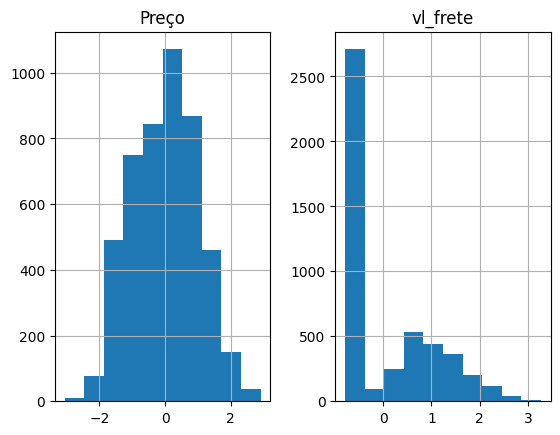

In [41]:
tbl_previsao.select_dtypes(include='number').apply(np.log1p).apply(scale).hist();

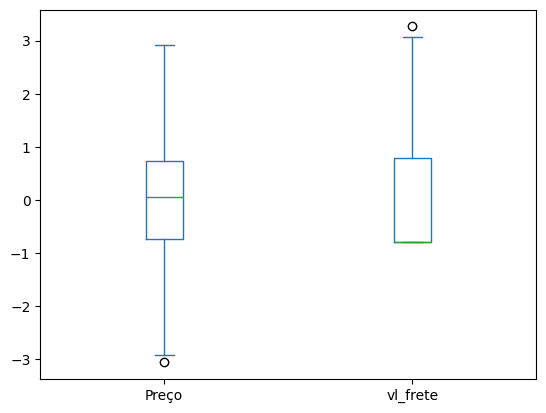

In [42]:
tbl_previsao.select_dtypes(include='number').apply(np.log1p).apply(scale).plot.box();

In [44]:
tbl_previsao.head()

,sigla_estado,idcanalvenda,bandeira,Nome_Departamento_ajustado,Preço,vl_frete
Data,,,,,,
2021-03-30,AL,Aplicativo,A,Outros,1935.216,0.0
2021-03-30,AL,Aplicativo,B,Beleza e Saude,126.408,0.0
2021-03-30,AL,Aplicativo,B,Eletrodomesticos,391.200,0.0
2021-03-30,AL,Aplicativo,B,Eletroportateis,279.840,0.0
2021-03-30,AL,Aplicativo,B,Informatica,1839.200,0.0


## Salvando dataset previsão

In [ ]:
# salvando o dataset de previsao
salvar_dataset(tbl_previsao, path='../data/processed/dataset_previsao.csv')

In [ ]:
# salvando o dataset de clientes
salvar_dataset(tbl_clientes, path='../data/processed/dataset_clientes.csv')